<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/Mini_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 한글 깨짐방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#일부 데이터 미리보기
train=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/movies_train.csv')
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
#데이터 요약
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
pd.options.display.float_format = '{:.1f}'.format

In [8]:
#데이터 요약통계량
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [9]:
#결측치 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [10]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
#'dir_prev_bfnum'의 결측값은 모두 0임을 확인(해당 감독의 이전 작품 없음)

0


In [11]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

## 데이터 시각화 및 분석

#### 1) 영화 개봉 년도에 따른 총 관객수

In [12]:
from datetime import datetime
train['release_time']=pd.to_datetime(train['release_time'])

In [13]:
train['release_year']=train['release_time'].dt.year
train[['release_year','box_off_num']].groupby('release_year').sum()


,box_off_num
release_year,
2010,48749235
2011,50309371
2012,83223817
2013,95698992
2014,75423331
2015,71504305


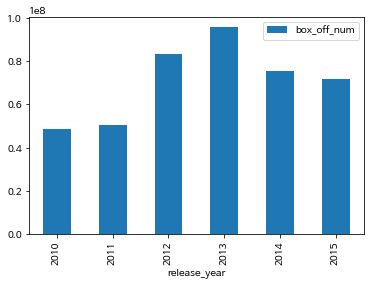

In [14]:
train[['release_year','box_off_num']].groupby('release_year').sum().plot(kind='bar')


- 2013년도의 총 영화 관객수가 가장 많다.

#### 2) 영화 장르별 평균 스텝 수

In [15]:
train[['genre','num_staff']].groupby('genre').mean()

,num_staff
genre,
SF,197.3
공포,176.4
느와르,311.1
다큐멘터리,17.8
드라마,164.5
멜로/로맨스,135.8
뮤지컬,2.2
미스터리,117.4
서스펜스,111.0


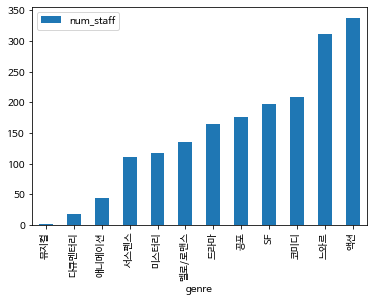

In [16]:
train[['genre','num_staff']].groupby('genre').mean().sort_values('num_staff').plot(kind='bar')

- 액션 장르의 스텝 수가 가장 많고 뮤지컬 장르의 스텝 수가 가장 적다.

#### 3) 상영등급 별 평균 상영시간

In [17]:
train[['screening_rat','time']].groupby('screening_rat').mean().sort_values('time')

,time
screening_rat,
전체 관람가,89.8
청소년 관람불가,99.5
12세 관람가,101.5
15세 관람가,106.9


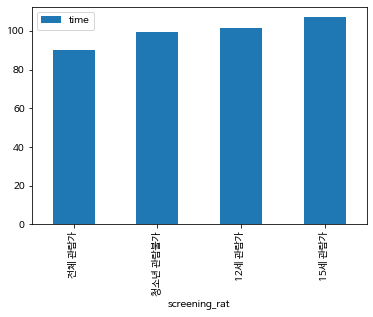

In [18]:
train[['screening_rat','time']].groupby('screening_rat').mean().sort_values('time').plot(kind='bar')


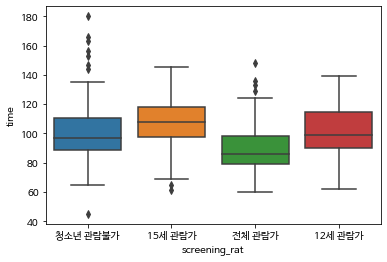

In [19]:
ax=plt.subplots()
ax=sns.boxplot(x='screening_rat',y='time',data=train)

- 전체 관람가 영화의 평균 상영시간이 가장 짧고, 15세 관람가 영화의 평균 상영시간이 가장 길다.

#### 4) 2010~2015 최고 흥행작 top 10

In [25]:
top10= train[['title','box_off_num']].sort_values('box_off_num',ascending=False)[0:10]
top10.index=top10['title']
top10

,title,box_off_num
title,,
국제시장,국제시장,14262766
도둑들,도둑들,12983841
7번방의 선물,7번방의 선물,12811435
암살,암살,12706663
"광해, 왕이 된 남자","광해, 왕이 된 남자",12323595
변호인,변호인,11374879
설국열차,설국열차,9350351
관상,관상,9135806
해적: 바다로 간 산적,해적: 바다로 간 산적,8666208


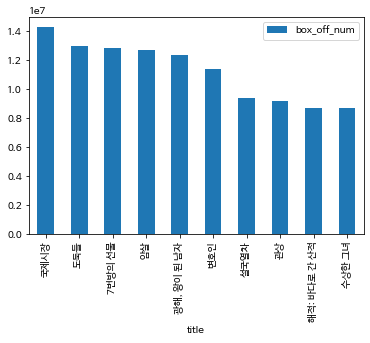

In [27]:
top10.plot(kind='bar')

- 2010~2015 최대 흥행작은 국제시장, 도둑들, 7번방의 선물 등이다.

#### 5) 스텝수와 러닝타임의 상관관계

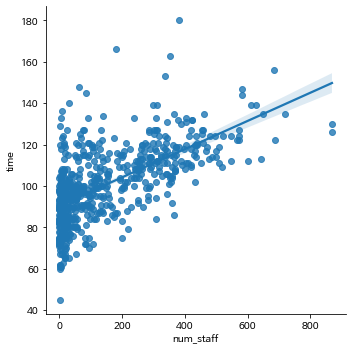

In [29]:
sns.lmplot(x='num_staff',y='time',data=train)

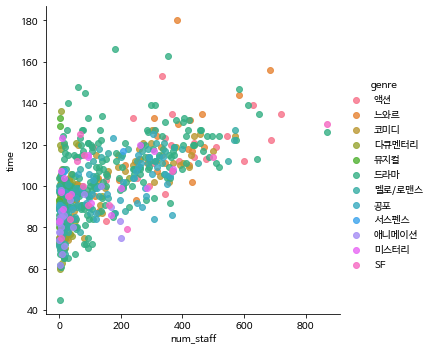

In [31]:
sns.lmplot(x='num_staff',y='time',data=train,hue='genre',fit_reg=False)